In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from bs4 import BeautifulSoup
import requests
import codecs
import os
path = '/content/drive/MyDrive/ДИПЛОМ/Списки компаний/data'

In [ ]:
path

'/content/drive/MyDrive/ДИПЛОМ/Списки компаний/data'

## Тесты

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from bs4 import BeautifulSoup

with open('/content/ООО _ОЗОН_.html', 'r') as f:

    contents = f.read()

    soup = BeautifulSoup(contents, 'lxml')

In [ ]:
company_name = soup.html.title.get_text()

In [ ]:
company_name

'ООО "ОЗОН"'

In [ ]:
len(soup.find('div', {"class": "card-menu__items"}).find_all('div', {'class': 'card-menu-items__group'}))

7

In [ ]:
sideback_panel_titles = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {'class': 'sp-facet__title-spoiler'})

In [ ]:
sideback_panel = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {"class": "sidebar-filters__section sidebar-filters__section_no-delimiter"})

In [ ]:
orgs_id = -1
for a in range(len(sideback_panel_titles)):
  if sideback_panel_titles[a].get_text() == 'Организации':
    orgs_id = a+1 # сначала публикации какие-то
  print(sideback_panel_titles[a].get_text())
print(orgs_id)

Организации
Персоны
Территории
1


In [ ]:
sideback_panel[orgs_id].find('div', {"class": "sp-facet"})

<div class="sp-facet"><div class="sp-facet__header"><div class="sp-facet__title-spoiler"><button class="btn js-not-print btn-sm btn_unstyled spoiler-button sp-facet__title sp-facet__title_collapsible spoiler-button_dark-text"><div class="btn__inner">Организации<span class="btn__right-icon"><svg class="sp-arrow-icon sp-arrow-icon_direction_up spoiler-button__icon js-not-print" height="10" viewbox="0 0 5 11" width="8" xmlns="http://www.w3.org/2000/svg"><rect fill="transparent" height="100%" width="100%"></rect><path class="sp-arrow-icon__path" clip-rule="evenodd" d="M-4.38425e-07 -0.00021553L5 4.64878L5 5.38079L0 10.0298L-5.91852e-08 8.67579C-5.91852e-08 8.67579 2.464 6.38479 3.933
 5.01979L-3.7924e-07 1.35378L-4.38425e-07 -0.00021553Z" fill="#000000" fill-rule="evenodd" stroke="0" stroke-width="0"></path></svg></span></div></button></div><div class="sp-facet__sort-btn"><button class="btn js-not-print btn-sm btn_icon"><div class="btn__inner"><div class="btn__icons"><span class="btn__svg-

In [ ]:
organizations = sideback_panel[3]c.find_all('button', {'class':'sp-fake-link sidebar-filter'})

In [ ]:
organizations[3].find('div', {'class':'sidebar-filter__label-name'}).get_text()

'Хабаровский край'

In [ ]:
all_orgs = []

organizations = sideback_panel[3].find('div', {"class": "sp-facet"}).find_all('button', {'class':'sp-fake-link sidebar-filter'})
for org in organizations:
  all_orgs.append(org.find('div', {'class':'sidebar-filter__label-name'}).get_text())
all_orgs

## Основная программа


In [17]:
path = '/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications'
list_of_files = pd.Series(os.listdir(path))
fltr_files = list_of_files[list_of_files.str.contains('.html') == True]
fltr_files = path + '/' + fltr_files

In [18]:
def parser(file_name):
  with open(file_name, 'r') as f:

    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')

    # Достаем неазвание компании
    company_name = soup.html.title.get_text()

    print(file_name)
    print(company_name)

    # Находим боковые панели со значениями
    sideback_panel = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {"class": "sidebar-filters__section sidebar-filters__section_no-delimiter"})

    # Находим наименования боковых панелей
    sideback_panel_titles = soup.find('div', {"class": "sidebar-filters"}).find_all('div', {'class': 'sp-facet__title-spoiler'})

    # Находим id в которой ссодержится информация по организациям
    orgs_id = -1
    for a in range(len(sideback_panel_titles)):
      if sideback_panel_titles[a].get_text() == 'Организации':
        orgs_id = a+1 # сначала публикации

    # Тесты
    print(len(sideback_panel))
    test = len(sideback_panel)-orgs_id
    all_orgs = []

    # Находим список организаций
    organizations = sideback_panel[orgs_id].find('div', {"class": "sp-facet"}).find_all('button', {'class':'sp-fake-link sidebar-filter'})
    for org in organizations:
      all_orgs.append(org.find('div', {'class':'sidebar-filter__label-name'}).get_text())

    return (test, {fl.split('/')[-1].split('.')[0]:all_orgs})

In [19]:
data = {}
result = []

for fl in fltr_files.to_list():
  res, comp = parser(fl)
  result.append(res)
  data.update(comp)

/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/9704082895.html
ООО "КТЗ"
6
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/7730569353.html
ООО "АВТОМИР-ТРЕЙД"
5
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/7703400140.html
ООО "ДЖИ ПИ СИ РУС"
5
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/8603118208.html
АО"СНПХ"
6
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/7710068052.html
АО "МОСМЕТРОСТРОЙ"
6
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/1655049111.html
АО "СЕТЕВАЯ КОМПАНИЯ"
6
/content/drive/MyDrive/ДИПЛОМ/Списки компаний/Парсеры для карточек компаний/company_smi_publications/7709340842.html
ООО "СУМИТЕК ИНТЕРНЕЙШНЛ"
5
/content/drive/MyDrive/ДИПЛ

In [20]:
data.keys()

dict_keys(['9704082895', '7730569353', '7703400140', '8603118208', '7710068052', '1655049111', '7709340842', '9718221490', '7719022542', '5042060699', '7704758153', '5029104266', '7838418751', '2315995868', '5403145086', '5047172389', '7707073366', '1654035998', '4826022365', '7705639173', '7705937571', '7727696432', '1655189422', '6632004667', '7701655865', '6663003800', '7732121736', '5046001101', '4623004836', '7717127211', '5047105054', '2922008546', '4633037968', '3814007314', '7703295463', '4909105495', '7810022460', '5609087920', '6229024796', '9705118142', '7707205911', '6732075238', '7709583813', '3811125221', '7730107662', '7701004101', '5001048893', '9715239467', '4203001913', '7811657720', '7704160892', '7709976356', '0270007455', '7718538045', '7705189397', '7705532790', '7830001028', '4216001565', '7706236515', '7703106050', '7017286512', '1001228754', '7428007317', '7702192017', '7705005321', '5827901723', '4252012308', '7710761161', '7731530768', '7729507377', '77166415

In [21]:
reversed_data = {}
for key, values in data.items():
  for value in values:
    reversed_data.setdefault(value, set()).add(key)

In [22]:
reversed_data

{'ПРОТОН, ООО': {'7721793895', '9704082895'},
 'АККОНД, АО': {'7017094419', '7729763331', '7743036465', '9704082895'},
 'ХИМПРОМ, ПАО': {'7725216105', '9704082895'},
 'ЗАВОД ЧУВАШКАБЕЛЬ, АО': {'6658388288', '9704082895'},
 'ЛЕНТА, АО': {'9704082895'},
 'ЯДРИНМОЛОКО, ОАО': {'9704082895'},
 'ЧПО ИМ. В.И.ЧАПАЕВА, АО': {'9704082895'},
 'БАНК УРАЛСИБ, ПАО': {'2309001660',
  '2315078029',
  '2903000446',
  '4716016979',
  '4823006703',
  '4826022365',
  '5001048893',
  '5021013384',
  '5029169023',
  '5036065113',
  '5047085094',
  '5407025576',
  '5501100816',
  '5904123809',
  '6164266561',
  '6229024796',
  '6606013640',
  '6606021264',
  '6623074298',
  '6671156423',
  '6671163413',
  '7017405576',
  '7204002873',
  '7606053324',
  '7703370008',
  '7703608910',
  '7705541227',
  '7705880068',
  '7706107510',
  '7708503727',
  '7708632345',
  '7709583813',
  '7709751313',
  '7709770002',
  '7710045520',
  '7710106212',
  '7710298176',
  '7712040126',
  '7713056834',
  '7721793895',
  '772

In [ ]:
orgs_count = {org: [len(reversed_data[org]), reversed_data[org]] for org in reversed_data}

In [ ]:
transitions = pd.DataFrame.from_dict(orgs_count, orient='index', columns=['count', 'org'])

In [ ]:
transitions_more_1 = transitions[transitions['count'] > 1].sort_values(by=['count'], ascending=False)
transitions_less_1 = transitions[transitions['count'] <= 1].sort_values(by=['count'], ascending=False)

In [ ]:
print(f'1) Размерноссть выборки: {transitions.shape[0]}')
print(f'2) Размерноссть выборки, в которой есть 2 и более компаний с совпадением: {transitions_more_1.shape[0]}')
print(f'3) Размерноссть выборки, в которой нет 2 и более компаний с совпадением: {transitions_less_1.shape[0]}')
print(f'Отношение 2)/3): {transitions_more_1.shape[0] / transitions_less_1.shape[0]}')

1) Размерноссть выборки: 5592
2) Размерноссть выборки, в которой есть 2 и более компаний с совпадением: 1510
3) Размерноссть выборки, в которой нет 2 и более компаний с совпадением: 4082
Отношение 2)/3): 0.3699167074963253


In [ ]:
transitions_more_1['count'].value_counts()

2      780
3      271
4      124
5       89
6       52
7       34
8       22
11      20
10      15
12      12
9       11
16       6
34       5
14       5
15       5
17       5
21       5
20       4
30       4
27       4
18       4
19       4
26       3
22       2
36       2
28       2
31       2
32       2
33       2
23       2
54       1
67       1
64       1
58       1
55       1
75       1
43       1
39       1
13       1
25       1
24       1
102      1
Name: count, dtype: int64

<Axes: >

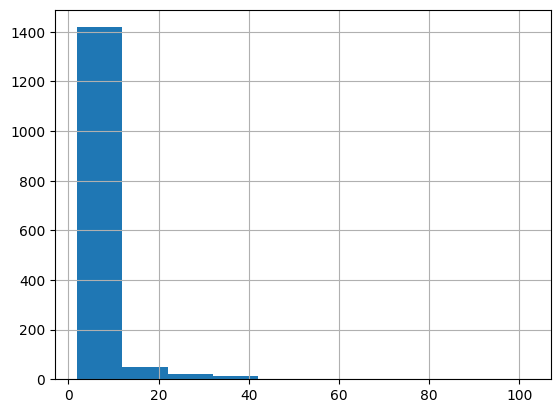

In [ ]:
transitions_more_1['count'].hist()

In [ ]:
comp_more_2 = []

transitions_more_1['org'].to_list()

[{'АО "АЙ-ТЕКО"',
  'АО "АММОНИЙ"',
  'АО "ГК "ПИОНЕР"',
  'АО "ГК "ТИТАН"',
  'АО "И.Т.М.С."',
  'АО "КМЭЗ"',
  'АО "КОМПАНИЯ УФАОЙЛ"',
  'АО "КТК"',
  'АО "КФ"',
  'АО "ЛАНЦЕТ"',
  'АО "МЕЖДУРЕЧЬЕ"',
  'АО "МИХЕЕВСКИЙ ГОК"',
  'АО "МОСМЕТРОСТРОЙ"',
  'АО "МУЛТОН"',
  'АО "МЭЛОН ФЭШН ГРУП"',
  'АО "НЭСК"',
  'АО "ОЭК"',
  'АО "ПРОГРЕСС"',
  'АО "САЯНСКХИМПЛАСТ"',
  'АО "СЕТЕВАЯ КОМПАНИЯ"',
  'АО "СУМЗ", АО "СРЕДНЕУРАЛЬСКИЙ МЕДЕПЛАВИЛЬНЫЙ ЗАВОД"',
  'АО "ТГК-16"',
  'АО "УЧАЛИНСКИЙ ГОК"',
  'АО "ЦКБ МТ "РУБИН"',
  'АО "ЧЕРНИГОВЕЦ"',
  'АО "ЭК "ВОСТОК"',
  'АО ФИРМА "АВГУСТ"',
  'ГУП "ВОДОКАНАЛ САНКТ-ПЕТЕРБУРГА"',
  'ГУП "ТЭК СПБ"',
  'ЗАО "КРОК ИНКОРПОРЕЙТЕД"',
  'ЗАО "МПК"',
  'ЗАО "ПРОФИТМЕД"',
  'ЗАО "СТАРОДВОРСКИЕ КОЛБАСЫ"',
  'ОАО "ВЕЛИКОЛУКСКИЙ МЯСОКОМБИНАТ"',
  'ОАО "ТД ЦУМ"',
  'ООО " ФРИТО ЛЕЙ МАНУФАКТУРИНГ"',
  'ООО "АЙ ЭЙЧ ПИ АППЛАЕНСЕС СЕЙЛС"',
  'ООО "АМУРСТАЛЬ"',
  'ООО "АСТРАЗЕНЕКА ФАРМАСЬЮТИКАЛЗ"',
  'ООО "АУР НАРО-ФОМИНСК"',
  'ООО "АЧИМ ДЕВЕЛОПМЕНТ"',
  'ООО "БАЛТИЙСК